# AIDI 1010 | Emerging AI Technologies

**Group Members**:
>- Gabriel Merida Margonato De Oliveira
>- Aniketkumar Narendrabhai Patel
>- Vrindha Pottayath Parambil Vijayan
>- Prasanna Rachabanti
>- Shirin Maksood Siddiqui

**Dataset:** https://archive.ics.uci.edu/ml/datasets/student%2Bperformance

___

## Assignment 1 - Feedbacks
- **Definition/Problem Statement:** Nicely laid out problem statement and its relevance in real life context. 7.5/10

- **Research/ML Prediction & Outcomes:** Although selected research papers were highlighted, however, detailed critical reflection was missing. 7/10

- **Hypothesis/ML Solution:** Solution could have been explained in much more elaborated manner but good job with embedding the code. 8/10

___

## Assignment 2

**AutoML Designated Tool**: GRP06 - autosklearn

**Questions to be answered:**
- How are you planning to visualize the results upon completion? 
- What’s coming up in your final project?





# Peer-Reviewed Research Papers

**Paper**: A Comparative Analysis of Techniques for Predicting Student Performance

- Year: 2016
- Approach: Support Vector Machines
- Link: https://eric.ed.gov/?id=ED592637

___
**Paper**: Study on student performance estimation, student progress analysis, and student potential prediction based on data mining

- Year: 2018
- Approach: Back Propagation Neural Network
- Link: https://www.sciencedirect.com/science/article/abs/pii/S0360131518300861

___
**Paper**: The relationship of student characteristics and student performance in science as viewed by meta-analysis research

- Year: 1983
- Approach: Qualitative Research
- Link: https://onlinelibrary.wiley.com/doi/abs/10.1002/tea.3660200510

In [31]:
#Accuracy Calculation
#How many instances did the model classify correctly?
accuracy = (TP+TN) / (TP+FP+TN+FN)
print("Accuracy:\t",round(accuracy*100,2),"%")

#Calculation of Specificity
#How good is the model at avoiding false positives?
specificity = TN / (TN + FP)
print("Specificity:\t",round(specificity*100),"%")

#Calculation of Sensitivity/Recall
#How often did the model find positives?
sensitivity = TP / (TP + FN)
print("Sensitivity:\t",round(sensitivity*100),"%")


Accuracy:	 89.74 %
Specificity:	 76 %
Sensitivity:	 94 %


In [12]:
# Load "portuguese course" dataset
df_pt = pd.read_csv('/content/drive/MyDrive/Georgian College/AIDI 1010/Assignment_1/dataset/student-por.csv', sep=';')

In [13]:
# Create a copy of the original dataset
df = df_pt

The categorical variables in both datasets were modeled in a binary scheme or a five-level classification.

**Main Variables:**
- `G1`: First period grade
- `G2`: Second period grade
- `G3`: Third period grade, also the student's final grade

In [14]:
# New "approved" column indicates if the student passed or not in that class. 
# It will later be used as our model's target

df['avg_grade'] = round((df['G1']+df['G2']+df['G3'])/3, 2)
df['approved']  = np.where(df['avg_grade'] >= 10, 1, 0)

In [15]:
df.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,avg_grade,approved
644,MS,F,19,R,GT3,T,2,3,services,other,...,2,1,2,5,4,10,11,10,10.33,1
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,1,1,1,4,15,15,16,15.33,1
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,5,6,11,12,9,10.67,1
647,MS,M,17,U,LE3,T,3,1,services,services,...,5,3,4,2,6,10,10,10,10.00,1
648,MS,M,18,R,LE3,T,3,2,services,other,...,1,3,4,5,4,10,11,11,10.67,1


# Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
from sklearn import metrics
from sklearn.metrics import r2_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### AutoML (auto-sklearn) Dependencies and Libraries

In [1]:
!sudo apt-get install build-essential swig
!apt-get install swig -y
!pip install auto-sklearn
!pip install scipy
!pip install sobol_seq

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.8ubuntu1.1).
Suggested packages:
  swig-doc swig-examples swig4.0-examples swig4.0-doc
The following NEW packages will be installed:
  swig swig4.0
0 upgraded, 2 newly installed, 0 to remove and 22 not upgraded.
Need to get 1,086 kB of archives.
After this operation, 5,413 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 swig4.0 amd64 4.0.1-5build1 [1,081 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 swig all 4.0.1-5build1 [5,528 B]
Fetched 1,086 kB in 0s (6,981 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 2.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
deb

In [4]:
import scipy
from scipy.optimize import *
#from shgo._shgo_lib import sobol_seq

In [5]:
import autosklearn

In [6]:
print('Scikit-learn version:', autosklearn.__version__)
print('Scipy version:',scipy.__version__)

Scikit-learn version: 0.15.0
Scipy version: 1.10.1


In [42]:
import autosklearn.regression
from autosklearn.regression import AutoSklearnRegressor
from autosklearn.automl import AutoML
from autosklearn.constants import REGRESSION

#Data Acquisition

# EDA

In [16]:
df.shape

(649, 35)

In [17]:
display(df.info())
print()
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      649 non-null    object 
 1   sex         649 non-null    object 
 2   age         649 non-null    int64  
 3   address     649 non-null    object 
 4   famsize     649 non-null    object 
 5   Pstatus     649 non-null    object 
 6   Medu        649 non-null    int64  
 7   Fedu        649 non-null    int64  
 8   Mjob        649 non-null    object 
 9   Fjob        649 non-null    object 
 10  reason      649 non-null    object 
 11  guardian    649 non-null    object 
 12  traveltime  649 non-null    int64  
 13  studytime   649 non-null    int64  
 14  failures    649 non-null    int64  
 15  schoolsup   649 non-null    object 
 16  famsup      649 non-null    object 
 17  paid        649 non-null    object 
 18  activities  649 non-null    object 
 19  nursery     649 non-null    o

None

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,avg_grade,approved
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009,11.625116,0.758089
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656,2.833308,0.428571
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.330000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000,10.000000,1.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000,11.670000,1.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000,13.330000,1.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000,18.670000,1.000000


## Demographic Data Analysis

In [ ]:
# Distribution of Age and Sex
ax = sns.countplot('age',hue='sex', data=df)
ax.set_title('Distribution of Student: Sex and Age')
ax.set_xlabel('Age')
ax.set_ylabel('Number of Students')
plt.show()

In [ ]:
# Impact of age and sex on grades
ax = sns.swarmplot(x='age', y='avg_grade',hue='sex', data=df)
ax.set_title('Sex, Age and avg_grade')
ax.set_xlabel('Age')
ax.set_ylabel('avg_grade')
plt.show()

Most students are between 15 and 18 years old, with a slightly higher number of girls.

Age and gender do not appear to have a clear influence on grade point averages.

In [ ]:
#Parents' education level impact on grades
Pedu = df['Fedu'] + df['Medu'] 
ax = sns.swarmplot(x=Pedu,y=df['avg_grade'])
ax.set_title('Parent\'s level of education impact on avg_grade')
ax.set_xlabel('Parents level of education')
ax.set_ylabel('avg_grade')
plt.show()

In [ ]:
# Parent's marriage status impact on grades
ax = sns.swarmplot(x=df['Pstatus'],y=df['avg_grade'])
ax.set_title('Marriage status impact on avg_grade')
ax.set_xlabel('A = Apart, T = Together')
ax.set_ylabel('avg_grade')
plt.show()

In [ ]:
# Quality of family relation
ax = sns.swarmplot(x=df['famrel'], y=df['avg_grade'])
ax.set_title('Quality x avg_grade')
ax.set_xlabel('Degree of Quality')
ax.set_ylabel('avg_grade')
plt.show()

Most families have 3 or more members, but this doesn't seem to have an effect on student grades.

We may notice slightly higher scores when the parents' education level is higher as well.

Analyzing the graphs above together, we can see that most of the students live with both parents, and that they have a good family relationship. However, this doesn't seem to affect their grades.

In [ ]:
# Travel time Analysis
ax = sns.boxplot(x='traveltime', y='avg_grade',hue='address', data=df)
ax.set_title('Address x Travel Time')
ax.set_xlabel('Travel Time (1: 15min, 2: 15min to 30min, 3: 30min to 1h, 4: more than 1h)')
ax.set_ylabel('avg_grades')
plt.show()

Students who live more than an hour away from school have a lower average than the others.

Students who live in urban areas have a higher average score than those who live in rural areas.

## Performance Data Analysis

In [ ]:
g = sns.catplot(x="sex", col="approved",
                 data=df, kind="count",
                 height=4, aspect=.7);

In [ ]:
#Analysis of the distribution of students' average grades
plt.hist(df['avg_grade'], bins=20, range=[0,20])
plt.title('Average Grades Distribution')
plt.xlabel('avg_grade')
plt.ylabel('quantity')
plt.show()

In [ ]:
#Analysis between the frequency that the student goes out with friends and average grades
ax = sns.boxplot(x=df['goout'],y=df['avg_grade'])
ax.set_title('Students who go out with friends')
ax.set_xlabel('How many times go out, per week')
ax.set_ylabel('avg_grade')
plt.show()

In [ ]:
#Analysis of alcohol consumption:
    # Let's join the columns "dalc" and "walc",
    # representing alcohol consumption during the week and on weekends, respectively

alc = df['Dalc'] + df['Walc'] 
ax = sns.swarmplot(x=alc,y=df['avg_grade'])
ax.set_title('Alcohol Consumption (Weekdays + Weekends)')
ax.set_xlabel('Degree of Consumption')
ax.set_ylabel('avg_grade')
plt.show()

There doesn't seem to be a correlation between the amount of times the student leaves, with their averages - since the extremes have similar medians.

Heavy alcohol consumption (grade 6 and above) results in lower average grades.

In [ ]:
#Analysis whether the desire to enter college has an impact on grades
ax= sns.boxplot(x=df['higher'],y=df['avg_grade'])
ax.set_title('Wish to pursue higher education')
ax.set_xlabel('Degree')
ax.set_ylabel('avg_grades')
plt.show()

In [ ]:
ax= sns.swarmplot(x=df['internet'],y=df['avg_grade'])
ax.set_title('Internet Connection')
ax.set_xlabel('Access')
ax.set_ylabel('avg_grade')
plt.show()

Students who want to go to university have considerably higher average grades.

There are more students with internet access, however there does not seem to be a high impact on average grades.

In [ ]:
#Impact of free time x activities in relation to the average
b = sns.boxplot(x=df['freetime'], hue=df['activities'], y=df['avg_grade'])
b.set_title('Free time and extracurricular activities')
b.set_xlabel('Free time')
b.set_ylabel('avg_grade')
plt.show()

In [ ]:
#Romantic Relationships
ax = sns.swarmplot(x=df['romantic'],y=df['avg_grade'])
ax.set_title('Students who Date')
ax.set_xlabel('Date')
ax.set_ylabel('avg_grade')
plt.show()

Free time and extracurricular activities do not have a large impact on averages.

Students who date have slightly lower averages than those who don't date.

In [ ]:
#Skipping class analysis
ax= sns.swarmplot(x=df['absences'],y=df['avg_grade'])
ax.set_title('Impact of Skipping Classes on Grades')
ax.set_xlabel('Number of Skips')
ax.set_ylabel('avg_grade')
plt.show()

In general, there is a tendency that the more students are absent, the lower their averages.

In [ ]:
#Repeating student analysis
ax = sns.violinplot(x=df['failures'],y=df['avg_grade'])
ax.set_title('Number of Failures')
ax.set_xlabel('Times Repeated')
ax.set_ylabel('avg_grade')
plt.show()

In [ ]:
#Study hours distribution analysis
plt.hist(df['studytime'], bins=5, range=[0,6])
plt.title('Study Time Analysis')
plt.xlabel('Hours/day')
plt.ylabel('Number of Students')
plt.show()

In [ ]:
ax= sns.boxplot(x=df['failures'],y=df['studytime'])
ax.set_title('Failure Analysis x Study Time')
ax.set_xlabel('Failures')
ax.set_ylabel('Study Time')
plt.show()

In general, students study 1 to 2 hours a day.

Students who study more hours per day tend to fail less.

Important note: Students who failed the most tend to have lower grades. This is important because it shows that the more students fail, the less interest they have - the less effort they make - in subsequent attempts.

# Model Training

**Approach**: Logistic Regression
<br>
**Target**: `approved` (1 = yes, 0 = no)

In [18]:
#one-hot encoding on categorical data

df_ohe = pd.get_dummies(df, columns = 
[
    'sex',
    'school',
    'address',
    'famsize',
    'Pstatus',
    'Mjob',
    'Fjob',
    'reason',
    'guardian',
    'schoolsup',
    'famsup',
    'paid',
    'activities',
    'nursery',
    'higher',
    'internet',
    'romantic'
])
df_ohe.head(1)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0


In [19]:
df_RL = df_ohe.drop('avg_grade', 1)
df_RL['approved'].value_counts(normalize=True)

<ipython-input-19-fe34f93b3e0e>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_RL = df_ohe.drop('avg_grade', 1)


1    0.758089
0    0.241911
Name: approved, dtype: float64

The dataset has a percentage of 75.8% approved and 24.2% not approved

In [20]:
#Through exploratory analysis, we will choose the variables of
#better correlation with the response variable

X_RL = df_RL[
    ['age',
     'Medu',
     'Fedu',
     'studytime',
     'traveltime',
     'failures',
     'famrel',
     'freetime',
     'goout',
     'Dalc',
     'Walc',
     'health',
     'absences',
     'G3'
     ]
]

y_RL = df_RL['approved']

In [21]:
#Train (70%) and Test (30%) split
X_train_RL, X_test_RL, y_train_RL, y_test_RL = train_test_split(
    X_RL, 
    y_RL, 
    test_size=0.30,
    random_state = 1
)

In [24]:
#normalization
scaler = StandardScaler()

X_train_RL_normalized = scaler.fit_transform(X_train_RL)
X_test_RL_normalized  = scaler.transform(X_test_RL)

In [25]:
#training the model
reg_log = LogisticRegression()
reg_log.fit(X_train_RL_normalized, y_train_RL)

LogisticRegression()

In [26]:
#predict and proba
y_predict_RL = reg_log.predict(X_test_RL_normalized)
y_proba_RL   = reg_log.predict_proba(X_test_RL_normalized)[:,1]

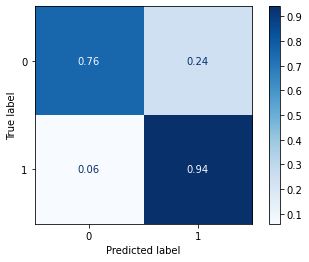

In [27]:
#confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test_RL, y_predict_RL)

#plot the confusion matrix
metrics.plot_confusion_matrix(
    estimator = reg_log, 
    X = X_test_RL_normalized, #predicted
    y_true = y_test_RL, #real
    cmap = 'Blues', 
    normalize = 'true'
);

**Matrix Analysis**

True positive (TP): means a correct classification of the positive class.

True negative (TN) : means a correct classification of the negative class

False positive (FP): means a wrong classification of the positive class

False negative (FN) : means a wrong classification of the negative class

In [28]:
TP = confusion_matrix[1][1]
TN = confusion_matrix[0][0]
FP = confusion_matrix[0][1]
FN = confusion_matrix[1][0]

print('True Positive: \t', TP)
print('True Negative:\t', TN)
print('False Positive:\t', FP)
print('False Negative:\t', FN)

True Positive: 	 141
True Negative:	 34
False Positive:	 11
False Negative:	 9


# AutoML Model Training

In [63]:
automl = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task = 1*60)

In [64]:
automl.fit(X_train_RL, y_train_RL)

AutoSklearnClassifier(ensemble_class=<class 'autosklearn.ensembles.ensemble_selection.EnsembleSelection'>,
                      per_run_time_limit=6, time_left_for_this_task=60)

## Evaluation

In [95]:
# evaluate the best model
y_pred = automl.predict(X_test_RL)

accuracy = automl.score(X_test_RL, y_test_RL)
mae = mean_absolute_error(y_test_RL, y_pred)

print("Accuracy:", round(accuracy*100,2),"%")
print("MAE:", mae)

Accuracy: 88.21 %
MAE: 0.11794871794871795


In [83]:
print(automl.sprint_statistics())

auto-sklearn results:
  Dataset name: 490eda3f-c057-11ed-80b7-0242ac1c000c
  Metric: accuracy
  Best validation score: 0.966667
  Number of target algorithm runs: 24
  Number of successful target algorithm runs: 24
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 0
  Number of target algorithms that exceeded the memory limit: 0



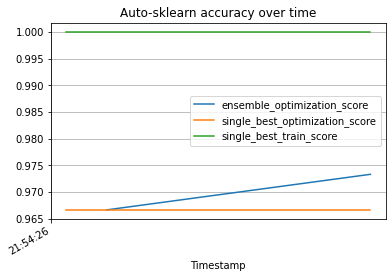

In [101]:
automl.performance_over_time_.plot(
        x='Timestamp',
        kind='line',
        legend=True,
        title='Auto-sklearn accuracy over time',
        grid=True,)
plt.show()

In [99]:
automl.get_params()

{'allow_string_features': True,
 'dask_client': None,
 'dataset_compression': True,
 'delete_tmp_folder_after_terminate': True,
 'disable_evaluator_output': False,
 'ensemble_class': autosklearn.ensembles.ensemble_selection.EnsembleSelection,
 'ensemble_kwargs': None,
 'ensemble_nbest': 50,
 'ensemble_size': None,
 'exclude': None,
 'get_smac_object_callback': None,
 'get_trials_callback': None,
 'include': None,
 'initial_configurations_via_metalearning': 25,
 'load_models': True,
 'logging_config': None,
 'max_models_on_disc': 50,
 'memory_limit': 3072,
 'metadata_directory': None,
 'metric': None,
 'n_jobs': None,
 'per_run_time_limit': 6,
 'resampling_strategy': 'holdout',
 'resampling_strategy_arguments': None,
 'scoring_functions': None,
 'seed': 1,
 'smac_scenario_args': None,
 'time_left_for_this_task': 60,
 'tmp_folder': None}

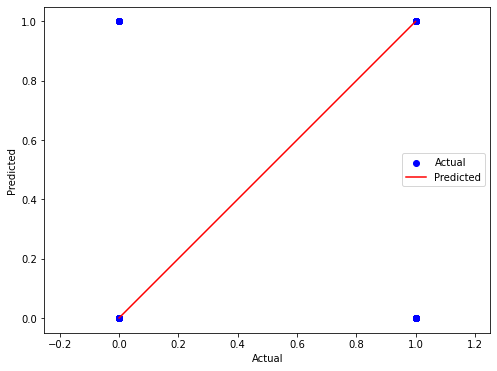

In [98]:
plt.figure(figsize=(8,6))
plt.scatter(y_test_RL, y_pred, c='blue')
p1 = max(max(y_pred), max(y_test_RL))
p2 = min(min(y_pred), min(y_test_RL))
plt.plot([p1, p2], [p1, p2], 'r-')
plt.xlabel('Actual', fontsize=10)
plt.ylabel('Predicted', fontsize=10)
plt.legend(['Actual', 'Predicted'])
plt.axis('equal')
plt.show()

Let's analyze our model with the function `show_models()`, as it returns a dictionary containing ensemble models. 
Each model in the ensemble can be accessed by giving its model_id as key.

A model dictionary contains the following:

- "model_id" - The id given to a model by autosklearn.
- "rank" - The rank of the model based on it’s "cost".
- "cost" - The loss of the model on the validation set.
- "ensemble_weight" - The weight given to the model in the ensemble.
- "voting_model" - The cv_voting_ensemble model (for ‘cv’ resampling).
- "estimators" - List of models (dicts) in cv_voting_ensemble (for ‘cv’ resampling).
- "data_preprocessor" - The preprocessor used on the data.
- "balancing" - The balancing used on the data (for classification).
- "feature_preprocessor" - The preprocessor for features types.
- "classifier" or "regressor" - The autosklearn wrapped classifier or regressor.
- "sklearn_classifier" or "sklearn_regressor" - The sklearn classifier or regressor.

Leadership analysis:

- "model_id" - The id given to a model by autosklearn.
- "rank" - The rank of the model based on it’s "cost".
- "ensemble_weight" - The weight given to the model in the ensemble.
- "type" - The type of classifier/regressor used.
- "cost" - The loss of the model on the validation set.
- "duration" - Length of time the model was optimized for.
- "config_id" - The id used by SMAC for optimization.
- "budget" - How much budget was allocated to this model. 
- "status" - The return status of training the model with SMAC.
- "train_loss" - The loss of the model on the training set. - "balancing_strategy" - The balancing strategy used for data preprocessing.
- "start_time" - Time the model began being optimized - "end_time" - Time the model ended being optimized
- "data_preprocessors" - The preprocessors used on the data - "feature_preprocessors" - The preprocessors for features types

In [100]:
automl.show_models()

{2: {'model_id': 2,
  'rank': 1,
  'cost': 0.033333333333333326,
  'ensemble_weight': 0.2,
  'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice at 0x7f9015ae3af0>,
  'balancing': Balancing(random_state=1),
  'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice at 0x7f9015ae3b20>,
  'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice at 0x7f9015ae3040>,
  'sklearn_classifier': RandomForestClassifier(max_features=3, n_estimators=512, n_jobs=1,
                         random_state=1, warm_start=True)},
 3: {'model_id': 3,
  'rank': 2,
  'cost': 0.07999999999999996,
  'ensemble_weight': 0.08,
  'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice at 0x7f9015ae0dc0>,
  'balancing': Balancing(random_state=1),
  'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice at 0x7f9015a

In [103]:
model_leadership = automl.leaderboard(detailed = True, ensemble_only=False, sort_order="descending")
model_leadership

,rank,ensemble_weight,type,cost,duration,config_id,train_loss,seed,start_time,end_time,budget,status,data_preprocessors,feature_preprocessors,balancing_strategy,config_origin
model_id,,,,,,,,,,,,,,,,
2,1,0.20,random_forest,0.033333,1.302809,1,0.000000,0,1.678572e+09,1.678572e+09,0.0,StatusType.SUCCESS,[],[no_preprocessing],none,Initial design
20,2,0.06,random_forest,0.033333,2.110035,19,0.006579,0,1.678572e+09,1.678572e+09,0.0,StatusType.SUCCESS,[],[polynomial],none,Initial design
18,3,0.06,random_forest,0.046667,1.318496,17,0.036184,0,1.678572e+09,1.678572e+09,0.0,StatusType.SUCCESS,[],[no_preprocessing],none,Initial design
10,4,0.04,gradient_boosting,0.053333,1.465713,9,0.000000,0,1.678572e+09,1.678572e+09,0.0,StatusType.SUCCESS,[],[select_percentile_classification],weighting,Initial design
25,5,0.00,gradient_boosting,0.053333,1.584224,24,0.000000,0,1.678572e+09,1.678572e+09,0.0,StatusType.SUCCESS,[],[feature_agglomeration],weighting,Initial design
6,7,0.00,sgd,0.060000,1.280051,5,0.042763,0,1.678572e+09,1.678572e+09,0.0,StatusType.SUCCESS,[],[no_preprocessing],none,Initial design
17,6,0.04,random_forest,0.060000,1.821580,16,0.039474,0,1.678572e+09,1.678572e+09,0.0,StatusType.SUCCESS,[],[select_percentile_classification],weighting,Initial design
7,8,0.04,extra_trees,0.066667,2.590677,6,0.016447,0,1.678572e+09,1.678572e+09,0.0,StatusType.SUCCESS,[],[polynomial],none,Initial design
21,9,0.02,random_forest,0.066667,1.529126,20,0.052632,0,1.678572e+09,1.678572e+09,0.0,StatusType.SUCCESS,[],[extra_trees_preproc_for_classification],weighting,Initial design
